In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [13]:
df = pd.read_csv('housewares.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Name,Variation,Body Title,Pattern,Pattern Title,DIY,Body Customize,Pattern Customize,Kit Cost,Buy,Sell,Color 1,Color 2,Size,Miles Price,Source,Source Notes,Version,HHA Concept 1,HHA Concept 2,HHA Series,HHA Set,Interact,Tag,Outdoor,Speaker Type,Lighting Type,Catalog,Filename,Variant ID,Internal ID,Unique Entry ID
0,acoustic guitar,Natural,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,3210,Beige,Brown,1x1,NaN,Crafting,NaN,1.0.0,music,None,None,None,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_0_0,0_0,383,EpywQXABBcv2dipsP
1,acoustic guitar,Cherry,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,3210,Red,Black,1x1,NaN,Crafting,NaN,1.0.0,music,None,None,None,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_1_0,1_0,383,K9she5Y4SuXA8MGBR
2,acoustic guitar,Brown,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,3210,Brown,Black,1x1,NaN,Crafting,NaN,1.0.0,music,None,None,None,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_2_0,2_0,383,vLq9iphAvALBXazDr
3,acoustic guitar,Blue,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,3210,Blue,Black,1x1,NaN,Crafting,NaN,1.0.0,music,None,None,None,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_3_0,3_0,383,nuqeFzNE5PneqGHaj
4,acoustic guitar,White,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,3210,White,Black,1x1,NaN,Crafting,NaN,1.0.0,music,None,None,None,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_4_0,4_0,383,DotFsojrhCwrLZ3TF


In [18]:
contingency_table = pd.crosstab(df['Color 1'], columns=df['HHA Concept 1'])
contingency_table

HHA Concept 1,None,bathroom,child's room,concert,den,expensive,facility,fancy,fitness,folk art,freezing cold,garage,garden,kitchen,living room,music,ocean,office,outdoors,party,school,shop,space,zen-style
Color 1,,,,,,,,,,,,,,,,,,,,,,,,
Beige,0,3,50,17,1,0,10,12,1,3,0,6,73,7,39,3,6,1,5,1,3,8,0,22
Black,2,15,52,32,1,0,37,3,10,0,0,8,26,12,50,7,5,2,25,8,13,21,3,11
Blue,1,8,56,24,0,0,12,8,6,0,13,6,17,8,17,2,7,1,21,5,8,20,3,8
Brown,1,9,46,15,3,1,22,17,1,1,0,8,84,13,60,9,16,1,12,6,6,20,0,46
Colorful,0,0,0,2,0,0,4,4,2,1,0,1,4,0,0,0,2,0,2,10,1,3,0,1
Gray,0,4,4,9,0,0,28,8,2,3,0,4,26,10,11,1,3,1,17,1,12,26,4,7
Green,0,9,45,7,1,0,7,9,3,3,12,7,25,0,21,2,3,1,20,12,29,17,2,17
Gren,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Light blue,0,6,13,8,0,0,4,8,1,0,14,3,9,0,9,0,2,1,3,2,0,13,1,3


In [22]:
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared statistic: 1414.7911294611154
P-value: 2.5597479062052136e-129


In [26]:
df['Buy'] = pd.to_numeric(df['Buy'], errors='coerce')

# Remove rows with NaN in the "Buy" column
df = df.dropna(subset=['Buy'])

# Calculate the correlation coefficient between Buy (now as numeric) and Sell prices
correlation = df['Buy'].corr(df['Sell'])

In [27]:
correlation

0.999999999818786

In [28]:
if correlation > 0:
    print(f"There is a positive correlation between Buy and Sell prices: {correlation}")
elif correlation < 0:
    print(f"There is a negative correlation between Buy and Sell prices: {correlation}")
else:
    print("There is no significant linear correlation between Buy and Sell prices.")

There is a positive correlation between Buy and Sell prices: 0.999999999818786


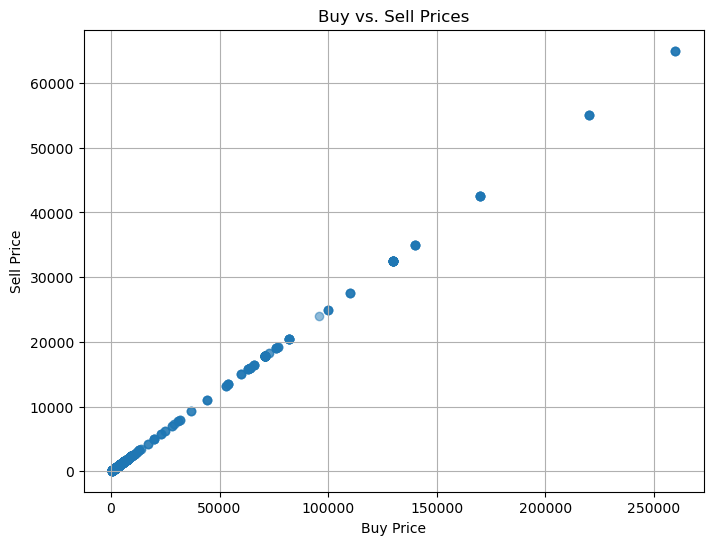

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Buy'], df['Sell'], alpha=0.5)
plt.title("Buy vs. Sell Prices")
plt.xlabel("Buy Price")
plt.ylabel("Sell Price")
plt.grid(True)
plt.show()